# Study of the Cross-section Limits 

Octobre 2017

In [1]:
%run "/home/ctherreau/initialize_midway.ipynb"

Initialization done, Notebook was last run on: 19/10/2017_10:18:


In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click to toggle code"></form>''')


## Some parameters....

In [3]:
# Parameters    
rhozero = 0.3 # GeV.cm-3.c-2: Densité locale de la particule du WIMP, page 90 Lewin et Smith
vzero = 220. # km/s: Vitesse de rotation de la galaxie, page 90 Lewin  et Smi
vent =1.05* vzero #km/s: Vitesse du WIMP par rapport à la Terre (halo), page 3 Gif double
A = 131. # Nombre de nucléon du noyau de Xénon
sigmap = 2*pow(10.,-47.)

print('Local Dark Matter density, rho_0 =', rhozero, 'GeV.cm^-3.c^-2')
print('Most Likely WIMP velocity (i.e. Galaxy rotation speed), v_0 =', vzero , 'km/s')
print('WIMP velocity relative to the Earth, v_E =', vent,  'km/s')
print('Nucleon Number A = ', A)
print('Nucleon-WIMP cross section considered, sigma_p =', sigmap, 'cm^-2')

Local Dark Matter density, rho_0 = 0.3 GeV.cm^-3.c^-2
Most Likely WIMP velocity (i.e. Galaxy rotation speed), v_0 = 220.0 km/s
WIMP velocity relative to the Earth, v_E = 231.0 km/s
Nucleon Number A =  131.0
Nucleon-WIMP cross section considered, sigma_p = 2e-47 cm^-2


In [4]:
## ....And Functions

In [5]:
def MassReduced (m1, m2) :
    return m1*m2/(m1+m2); 

In [6]:
def FormFactor(A, Er) :

    #Fonction facteur de forme déjà au carré
    
    thickness = 0.9 * pow(10.,-15.) # m:  Paramètre d'épaisseur de peau nucléaire, page 98 Lewin et Smith
   
    an = 1.14# constante rn  page 98 Lewin et Smith (identification avec équation page 94)
    
    bn=0 #  constante rn  page 98 Lewin et Smith (identification avec équation page 94)

    qrn = (6.92 * pow(10. , -3.)) * pow(A, 0.5) * pow(Er, 0.5) *(an * pow(A, (1.0/3.0))+bn) #sans dimension page 94 Lewin et Smith
    
    #Tranfert d'impulsion entre le WIMP et le noyau cible, page 94 Lewin et Smith
    TI= (pow(2 * 0.9315 * A * Er, 0.5))*pow(10.,-5.)/3 #kev.s/m 
    
    #Fonction pour calculer le facteur de forme en considérant une sphère solide page 96 Lewin et Smith
    j1 = ((np.sin(qrn)-(qrn * np.cos(qrn))) / (pow(qrn, 2.))) 
    
    return pow((3 * j1 / qrn) * np.exp(-(pow((TI * thickness), 2.))/2), 2.)  



In [7]:
from scipy import special

def erreur( A,  Er, mreduite):
# Les deux fonctions erreur réunies

    # Vitesse de rotation de la galaxie, page 90 Lewin  et Smith
    vzero = 220. # km/s
    
    #Vitesse du WIMP par rapport à la Terre (halo), page 3 Gif double
    vent =1.05* vzero #km/s
    
    #Vitesse minimum du WIMP pour qu'il donne une énergie de recul au Xénon, page 3 Gif // Er est en keV et mreduite en GeV/c2
    vmin = (pow((A * (0.9315 ) * Er)/(2 * pow(mreduite, 2.)), 0.5))*300 # km/s


    return (special.erf((vmin+vent)/vzero)-special.erf((vmin-vent)/vzero))

In [8]:
def Rate(sigmazero, rhozero, vent, mchi, mreduite,A, Er):
# Fonction calculant dR/dEr

    N = 4.3685*pow(10., 41.)# // Facteur de normalisation de la fonction
    
    return (((sigmazero * rhozero) / (4 * vent * mchi * pow(mreduite, 2.))) * (FormFactor(A, Er)) * (erreur(A, Er, mreduite))*N)

## Efficiency for XENON1T as a function of the Recoil Energy

From XENON1T first paper (arXiv 1705.0665v1)
 

https://github.com/XENON1T/FirstResults/blob/54cbbc99a1a4152a73a0375a25d56758aaf17db9/Paper/Fig1_Efficiency.ipynb

In [9]:
offset=0
eff =[ 0.        ,  0.        ,  0.02439024,  0.11654135,  0.28268551,
        0.46520147,  0.59328358,  0.69034749,  0.76760563,  0.79422383,
        0.82068966,  0.82954545,  0.83846154,  0.84842105,  0.84701493,
        0.84536082,  0.84558824,  0.84590164,  0.85347222,  0.84814815,
        0.85074627,  0.84590164,  0.84210526,  0.84642857,  0.84074074,
        0.8437037 ,  0.84532374,  0.84140351,  0.83933333,  0.83458647,
        0.83458647,  0.81727575,  0.8045977 ,  0.78346457,  0.74919355,
        0.70895522,  0.66793893,  0.60714286,  0.54676806,  0.48776978,
        0.41077441,  0.34928571,  0.28476821,  0.2260274 ,  0.17589577,
        0.13333333,  0.09395973,  0.06802721,  0.04895105,  0.03370787,
        0.02135231,  0.01153846,  0.00711744,  0.00408163,  0.00361011,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.       ]
      
Er=[]      
for i in range (0,100): 
    Er.append(i+0.5+offset)

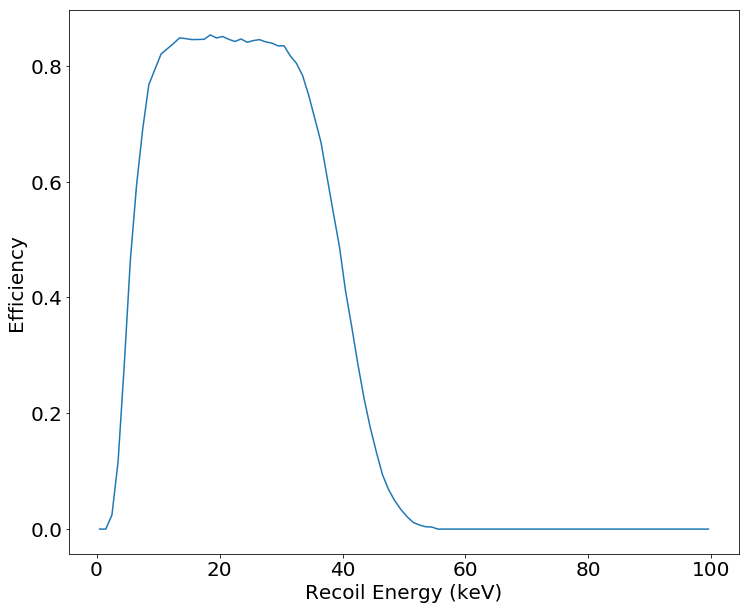

In [10]:
EffPlot=plt.plot(Er,eff)
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Efficiency")
plt.show()

## Differential Rate  for a Wimps Mass of 35 GeV as a function of the Recoil Energy
#### Based on Lewin and Smith

In [11]:
# Differential Rate for a Wimps mass of 35 GeV as a function of Er

mchi =35 # WIMP mass

xdiffrate=[] # = Recoil Energy-offset
diffrate=[]  

mreduite = MassReduced (mchi, A*0.9315)
mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))

# Sigma Zero based on Lewun and Smith
sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) 

for i in range(0,2000):
    #Offset influence the efficiency not the differential rate
    xdiffrate.append(i*0.1+1)
    diffrate.append(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,xdiffrate[i])) 
    
                                                        

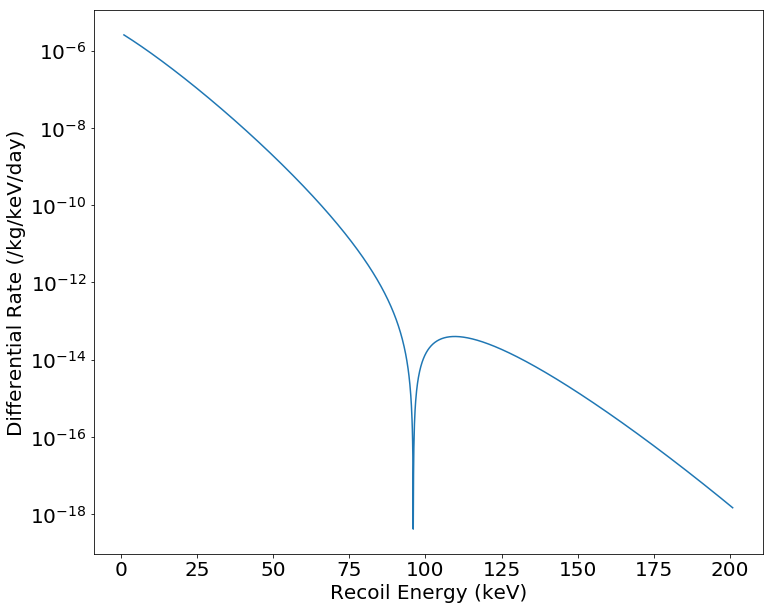

In [12]:
DiffPlot=plt.semilogy(xdiffrate,diffrate)
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Differential Rate (/kg/keV/day)")
plt.show()

## Number of event with XENON1T for a WIMP mass of 35 GeV as a function of the recoil energy
Differential rate * detection efficiency => Number Of Event /kg/keV/day

In [13]:
#Efficiency * Differential Rate for each Recoil Energy
NumberOfEvent=[]
for i in range (0,len(Er)):
    #idx= np.where(ErValues==Er[i])
    NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
NumberOfEvent=np.concatenate(NumberOfEvent)

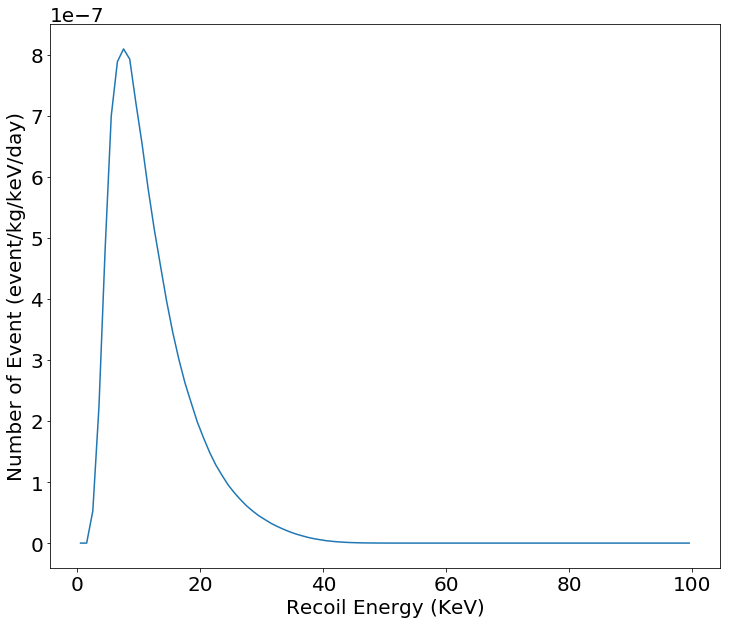

In [14]:
plt.plot(Er,NumberOfEvent)
plt.xlabel("Recoil Energy (KeV)")
plt.ylabel("Number of Event (event/kg/keV/day)")
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

plt.show()

In [15]:
print(' The total number of event for a WIMP mass of 35 GeV/c² is : ', integrate.simps(NumberOfEvent, Er) , '(or trapz', trapz(NumberOfEvent), ') event/kg/day')

 The total number of event for a WIMP mass of 35 GeV/c² is :  9.67046663732e-06 (or trapz 9.67046663732e-06 ) event/kg/day


# Expected number of events as a function of the WIMP mass
## Procedure apply for each WIMP mass :

- the expected number of events as a function of the recoil energy is calculated as shown just before for m=35 GeV/c²
- I integrated this number of events over the recoil energy

Then, I ploted the total number of events as a function of the WIMP mass

In [16]:

n_mass=1000 
Xmass=[]    
Integral=[]

n = len(Er)  
for m in range (5,1000):
    Xmass.append(1.0*m) 
    mchi = 1.0*m
    mreduite = MassReduced (mchi, A*0.9315)
    mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))
    sigmazero = (sigmap*pow(A,2)*pow(mreduite,2))/pow(mReduiteProton,2)   
    #eff*taux pour mchi = m 
    y=[]  
    #  h = ROOT.TH2D("h","test ROOT",100,0,120,100,0,0.00007)

    for i in range (0,n):
        y.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A, Er[i]),eff[i]))

    Integral.append(integrate.simps(np.concatenate(y)))


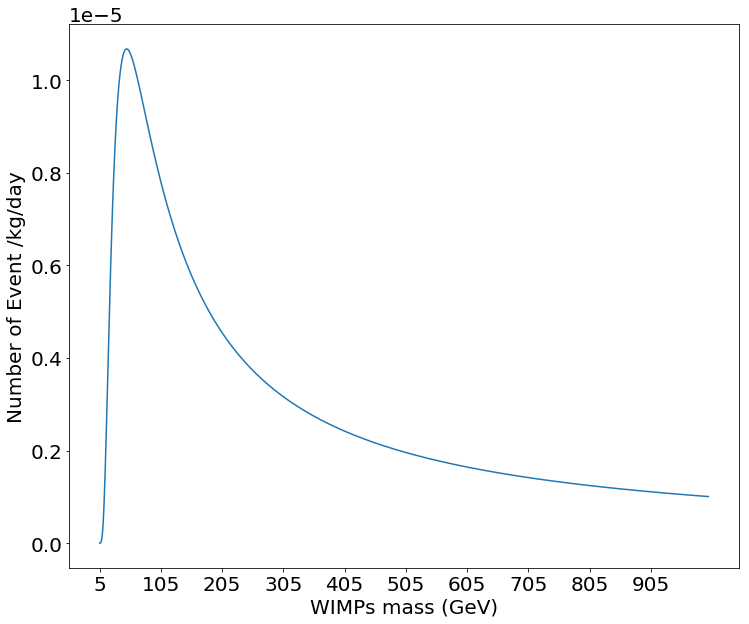

In [17]:
plt.plot(Xmass,Integral)
plt.ylabel("Number of Event /kg/day")
plt.xlabel("WIMPs mass (GeV)")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,3))
plt.xticks(np.arange(min(Xmass), max(Xmass)+1, 100))
plt.show()  

In [18]:
max_event = max(Integral)  # Find the maximal number of events
max_x= np.where(Integral==max_event)[0] # Find the "position" in the x array that reach the maximal number of events 
MassWimpMaxEvent =Xmass[max_x] # Find the WIMP mass that gives the maximal number of event
print("Maximal Event Rate = ",max_event,"event/kg/day = ", max_event*2*1000*365.25," total event for a 2t-y exposure; for a WIMP mass =",MassWimpMaxEvent , "GeV.")


Maximal Event Rate =  1.06770924163e-05 event/kg/day =  7.79961601013  total event for a 2t-y exposure; for a WIMP mass = 49.0 GeV.


/project/lgrandi/anaconda3/envs/pax_v6.8.0/lib/python3.4/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  app.launch_new_instance()


In [19]:
print('With a WIMP mass of', Xmass[95], 'GeV/c^2, the total number of events for an exposure of 2 t-y is :', Integral[95]*2*1000*365.25)

With a WIMP mass of 100.0 GeV/c^2, the total number of events for an exposure of 2 t-y is : 5.89392260991


# Derivation of the cross section limits 

### Hypothèse : 0 events vu
D'après le PDG Bookley Section 38.4.2.3 : 

Si on a vu 0 events à la place de N (Nombre d'évènement total, pour un couple de paramètre (sigma_p, m_chi), alors on peut exclure ce couple de paramètres si N > 3 (à 95% de niveau de confiance) et si N> 2,30 (à 90% de niveau de confiance)

Pour déterminer la limite, on calcul tout les couples (sigma_p, mchi) pour lesquels N = 3/2,30

### Si bruit de fond => Likelihood methode ! (Next Step)

Comme première approx, en sachant que XENON1T "voit" 2 events de bruit de fond, on va demander N=5 à 90% de confiance 

In [19]:
# # For a given mass :
# mchi= 100
# sigmap = pow(10.,-46) #2*pow(10,-47)
# mreduite = MassReduced (mchi, A*0.9315)
# mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))

# # Sigma Zero based on Lewun and Smith
# sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) 
# #Efficiency * Differential Rate for each Recoil Energy
# NumberOfEvent=[]

# for i in range (0,len(Er)):
#     NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
# N=trapz(np.concatenate(NumberOfEvent))*2*1000*365

# while (N>5) : 
#     sigmap=sigmap/1.001
#     # Sigma Zero based on Lewun and Smith
#     sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) 
#     #Efficiency * Differential Rate for each Recoil Energy
#     NumberOfEvent=[]
#     for i in range (0,len(Er)):
#         NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
            
#     N=integrate.simps(np.concatenate(NumberOfEvent))*2*1000*365 
    
# print('With a WIMP mass of', mchi, 'GeV/c2, the limits cross section is ', sigmap)    

In [20]:
import scipy.integrate as integrate
def Cross_Section_Limit(mchi_init, sigma_p_init, N_limit, Exposure):
    mass_limits=[]
    sigma_limits=[]
    mchi=mchi_init
    sigmap=sigma_p_init
    
    for j in range (0,200):
        
        mass_limits.append(mchi) #Array with contain the mass
    
        mreduite = MassReduced (mchi, A*0.9315)
        mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))
        # Sigma Zero based on Lewun and Smith
        sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) 
        #Efficiency * Differential Rate for each Recoil Energy
        NumberOfEvent=[]
    
        for i in range (0,len(Er)):
            NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
        
        N=integrate.simps(np.concatenate(NumberOfEvent))*Exposure
    
        while (N>N_limit) : 
            sigmap=sigmap/1.01
            # Sigma Zero based on Lewun and Smith
            sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) 
            #Efficiency * Differential Rate for each Recoil Energy
            NumberOfEvent=[]
            for i in range (0,len(Er)):
                NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
            N=integrate.simps(np.concatenate(NumberOfEvent))*Exposure
        
        sigma_limits.append(sigmap) #Array with contain sigma limits
    
        mchi=mchi+5
        sigmap=sigmap*2.5
    
    return sigma_limits, mass_limits

# XENON1T 2t-y exposure 

In [26]:
exposure=2*1000*365
sigmap = pow(10.,-46) #2*pow(10,-47)
mchi=5

sigma_limits_Xe1T_2ty, mass_limits_Xe1T_2ty = Cross_Section_Limit(mchi,sigmap,5,exposure)

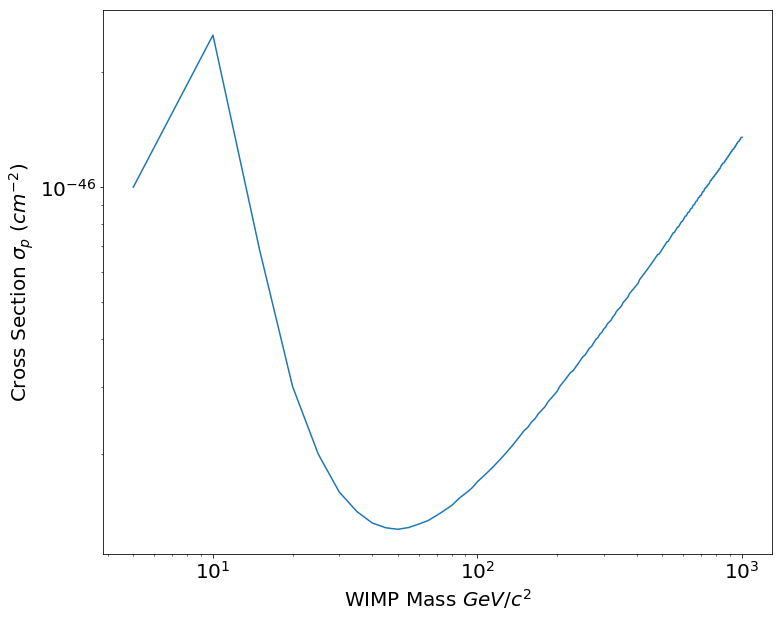

In [27]:
plt.loglog(mass_limits_Xe1T_2ty, sigma_limits_Xe1T_2ty)
plt.ylabel('Cross Section $\sigma_p$ ($cm^{-2}$)')
plt.xlabel('WIMP Mass $GeV/c^2$')
plt.show()

In [28]:
min_cross_section = min(sigma_limits_Xe1T_2ty)  # Find the minimal cross section
print("The minimal cross section is", min_cross_section, 'cm^-2; while the value of the MC paper is 1.6e-47 cm^-2, at 50 GeV')#, ' reached for a WIMP mass of ', min_x)#, MassWimpMinCrossSection)


The minimal cross section is 1.2720870727301389e-47 cm^-2; while the value of the MC paper is 1.6e-47 cm^-2, at 50 GeV


In [30]:
print('At',mass_limits_Xe1T_2ty[9],'GeV/c2, Sigma_P =', sigma_limits_Xe1T_2ty[9], 'cm^-2')


At 50 GeV/c2, Sigma_P = 1.2720870727301389e-47 cm^-2


# XENON1T 32.4 days of exposure

In [41]:
exposure=1000*32.4
mchi=5
sigmap = pow(10.,-44) #2*pow(10,-47)

sigma_limits_Xe1T_32d, mass_limits_Xe1T_32d = Cross_Section_Limit(mchi,sigmap,5,exposure)

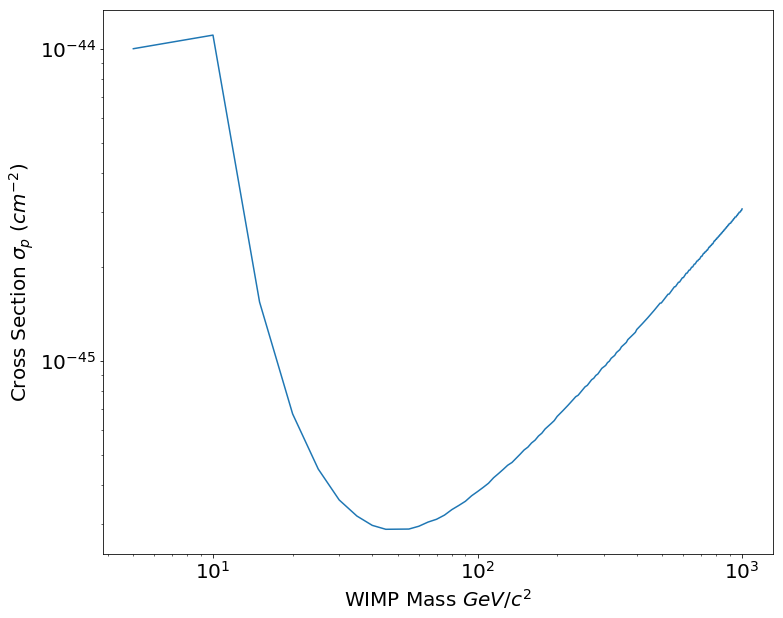

In [42]:
plt.loglog(mass_limits_Xe1T_32d, sigma_limits_Xe1T_32d)
plt.ylabel('Cross Section $\sigma_p$ ($cm^{-2}$)')
plt.xlabel('WIMP Mass $GeV/c^2$')
plt.show()


In [43]:
min_cross_section = min(sigma_limits_Xe1T_32d)  # Find the minimal cross section
print("The minimal cross section is", min_cross_section, 'cm^-2; while the value of the paper is 7.7e-47 cm^-2, at 35 GeV')#, ' reached for a WIMP mass of ', min_x)#, MassWimpMinCrossSection)


The minimal cross section is 2.8857488080577205e-46 cm^-2; while the value of the paper is 7.7e-47 cm^-2, at 35 GeV


In [ ]:
print('At',mass_limits_Xe1T_32d[5],'GeV/c2, Sigma_P =', sigma_limits_Xe1T_32d[5], 'cm^-2')


At 30 GeV/c2, Sigma_P = 3.5826789015124856e-46 cm^-2


# XENON100 225 days of exposure

Pas vraiment représentatif = efficacité est celle de XENON1T

In [ ]:
# Double Loup
exposure=100*225
mchi=5
sigmap = pow(10.,-44) #2*pow(10,-47)

sigma_limits_Xe100, mass_limits_Xe100 = Cross_Section_Limit(mchi,sigmap,4,exposure)


In [ ]:
plt.loglog(mass_limits_Xe100, sigma_limits_Xe100)
plt.show()

In [ ]:
min_cross_section = min(sigma_limits_Xe100)  # Find the minimal cross section
print("The minimal cross section is", min_cross_section, 'cm^-2; while the value of the paper is 2e-45 cm^-2, at 55 GeV')#, ' reached for a WIMP mass of ', min_x)#, MassWimpMinCrossSection)
